 ## $\underline{ \textbf{Data assimilation on a PAPA}}$
 
 
 
 **Statut** : In progress
 
**Purpose**: We propose here an assimilation problem coupled with Solver DL (deep learning), the goal is to infer the mass **m** and the moment of inertia **$I_\alpha$** of a PAPA from observations made on the displacements.
 
 
 **Reference** : 
 
 [1] : [ V. Mons, J.-C. Chassaing, T. Gomez, P. Sagaut, "Reconstruction of unsteady viscous flows using data assimilation schemes", JCP 316 (2016) p. 255-280.](https://dropsu.sorbonne-universite.fr/s/oP8s9CeNS5zW5DG)
 
 [2] : [ A. Chaarane, "Data Assimilation for Flow Induced Vibrations",Stage, InstitutJean Le Rond D’Alembert, 2021.](https://dropsu.sorbonne-universite.fr/s/kr97PiKoJ8jFHfw)
 
 
-----------------------------------
**A. Chaarane**, Institute  D'Alembert, (3 May 2022)

-----------------------------------

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import math
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle
import os
import sys
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import copy
from tabulate import tabulate

# ------ Importation Local
# utils for Post-Trait ( plot, ..)
sys.path.append("../")
from Post_Trait import POSTRAIT, All_Data_Set
import  Pred_Coupling_DA_DL as PCG

Path_src     = "../../"
#--- DATA : output of DA code

#--- Config 
PATH_CONF = Path_src+"Inference_Problem/CAEL/" 
sys.path.append(PATH_CONF)


In [3]:
PST_dic = {}
List_color =  ["black","grey", "blue", "red",  "green","cyan", "orange","purple", "pink", "brown", "olive","yellow", "tomato","darkcyan","steelblue","rosybrown"]

n_ens    = 40
sig_ens  = 0.3

label    = " EnVar"

k =0

Path_res       = "CAEL/AmpFreq/"
PATH_DATA      = Path_src+"DATA_CAEL_NEW_MODEL/DA_4DEnVar_V2/"+Path_res
color          = List_color[k]
PST            = POSTRAIT(PATH_DATA,label=label,color=color, Path_Src=Path_src)
PST_dic[label] = PST
k+=1


In [4]:
PST.show_cfg()

-------------------------------------------------------------------------------------------------------------------
                                                Parametres                                         
--------------------------------------------------------------------------------------------------------------------
     Modele name      :                   CAEL                
     DA Method        :                   4DEnVar (V2)        
     Uncertains param :                                                       
                  name     : pitch_amp   pitch_frq
                 reference : pitch_amp = 2.51   pitch_frq = 62.5   
                 estimate  : pitch_amp = 3.5   pitch_frq = 75   
                                                                         
     Nbr Iteration =  20  |  Nbr Ensemble =   40  | Param_sigma = 0.300000
                                                                         
     Observations     :                                

### Control Vectors  

In [5]:
all_gamma = [PST_dic[label].CFG.Param_Ref, PST_dic[label].CFG.Param_Est]
index   = ["Reference","Initialisation"]

for key, PST in PST_dic.items() :
    all_gamma.append(PST.Param_Opti)
    index.append("Optimized {"+PST.label+"}")
    
df =pd.DataFrame(all_gamma, index = index,columns=PST_dic[label].CFG.Param_Name)    

print(tabulate(df.T, tablefmt='grid',headers='keys'))
print("")    

+-----------+-------------+------------------+----------------------+
|           |   Reference |   Initialisation |   Optimized { EnVar} |
+===========+=============+==================+======================+
| pitch_amp |        2.51 |              3.5 |              2.53407 |
+-----------+-------------+------------------+----------------------+
| pitch_frq |       62.5  |             75   |             62.5069  |
+-----------+-------------+------------------+----------------------+



# Function Cost  and HF ratio


$\newcommand{\Gama}{\boldsymbol{\gamma}} 
\newcommand{\B}{\boldsymbol{B}} 
\newcommand{\C}{\boldsymbol{C}} 
\newcommand{\Gamae}{\boldsymbol{\gamma}^{(e)}}
\newcommand{\YN}{( \boldsymbol{y}{_k})_{0\leq k\leq N}}
\newcommand{\XN}{( \boldsymbol{x}{_k})_{0\leq k\leq N}}
\newcommand{\Ep}{ \boldsymbol{E}'}
\newcommand{\Beta}{ \boldsymbol{\beta}}
\newcommand{\h}{ \boldsymbol{h}}
\newcommand{\x}{ \boldsymbol{x}}
\newcommand{\y}{ \boldsymbol{y}}$



\begin{equation}
    J = \underbrace{\frac{1}{2} \Vert \Gama-\Gamae \Vert ^2_{\B^{-1}} }_{J_b}+\underbrace{\frac{1}{2} \sum_{k=0}^{N} \Vert \boldsymbol{y}_k -\boldsymbol{h}(\boldsymbol{x}_k) \Vert^2_{\C^{-1}}}_{J_{obs}}
    \label{eq_J}
\end{equation}


### Function Cost

In [6]:
i_main_DL = 3

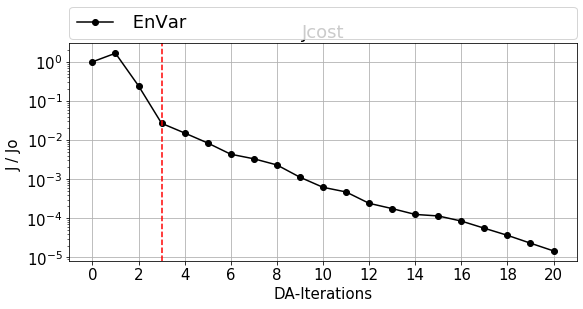

In [7]:
plt.figure(figsize=(20,4))
# List_Jcost = ["Jcost", "Jobs", "Jb", "Jbeta"]
List_Jcost = ["Jcost"]
k = 1
for k_cost, name_cost in enumerate(List_Jcost) :
    plt.subplot(1,2,k)
    for key, PST in PST_dic.items() :
        PST.plot_Jcost(linestyle='-o',k=k_cost)
        plt.title(name_cost, fontsize =18)
        
        plt.axvline(x=i_main_DL,c="r",linestyle='--',lw =1.5)

    plt.grid(True)
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                                mode="expand", borderaxespad=0, ncol=2,fontsize=18)
    if k % 2 == 0 and k!= len(List_Jcost):
        k = 1
        plt.show()
        plt.figure(figsize=(20,4))
        
    else :
        k+=1

plt.show()

###   Relative Error  

$$ e_r = \frac{\gamma_{opti} - \gamma_{ref} } {\gamma_{ref}} \times 100$$

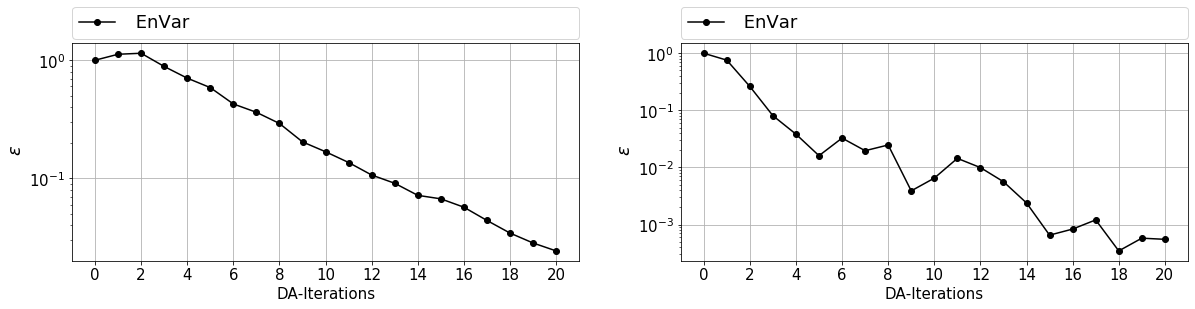

In [8]:
n_col = len(PST.CFG.Param_Name)
plt.figure(figsize=(20,4))

k=1
y_label =  "U_r"

for i,name in enumerate(PST.CFG.Param_Name) :
    
    plt.subplot(1,n_col,k)
    for key, PST in PST_dic.items() :
        
        N_iter  = [j for j in range(len(PST.Param_error))]
        plt.plot(N_iter, PST.Param_error[:,i]/PST.Param_error[0,i],'-o', c=PST.color,label = PST.label)

    new_list = range(math.floor(min(N_iter)), math.ceil(max(N_iter))+1,2)
    plt.xticks(new_list, fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('DA-Iterations',fontsize=15)
    plt.ylabel(fr" $\epsilon$",fontsize=18)
    plt.yscale("log")
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                            mode="expand", borderaxespad=0, ncol=2,fontsize=18)    
    plt.grid()
    plt.axvline(x=PST.i_start_ML,label="Start DL coupled",c="r",linestyle='--')
    
    if k ==n_col and i!=len(PST.CFG.Param_Name)-1:
        plt.show()
        plt.figure(figsize=(20,4))
        k=1
    else :
        k+=1

# Reconstruction of Aerodynamic Forces oscillations. 

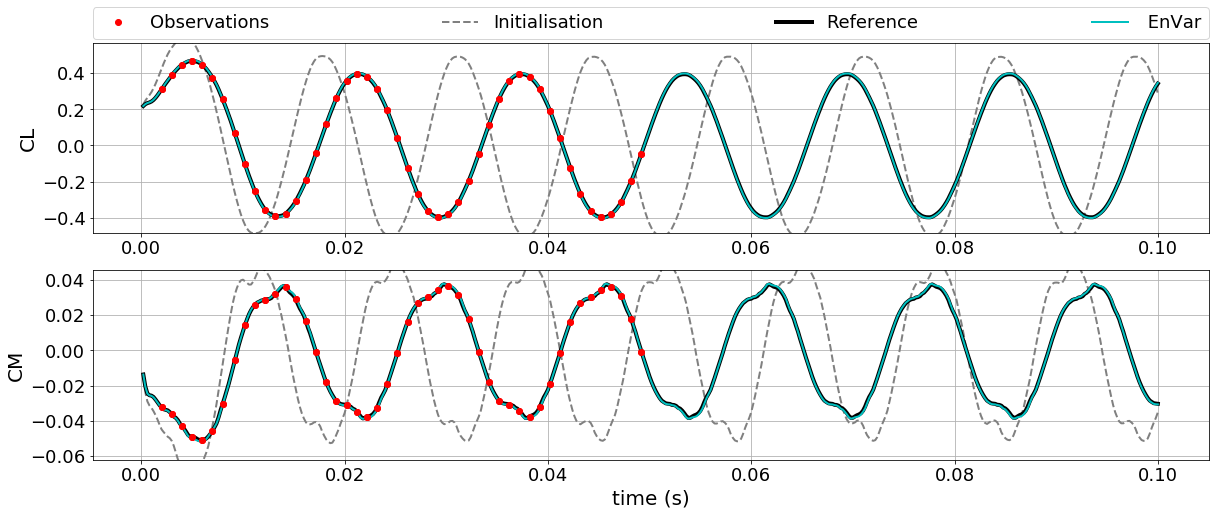

In [9]:
plt.figure(figsize=(20,200))
PST.plot_obs_ref_est_opt()

## Data sets 

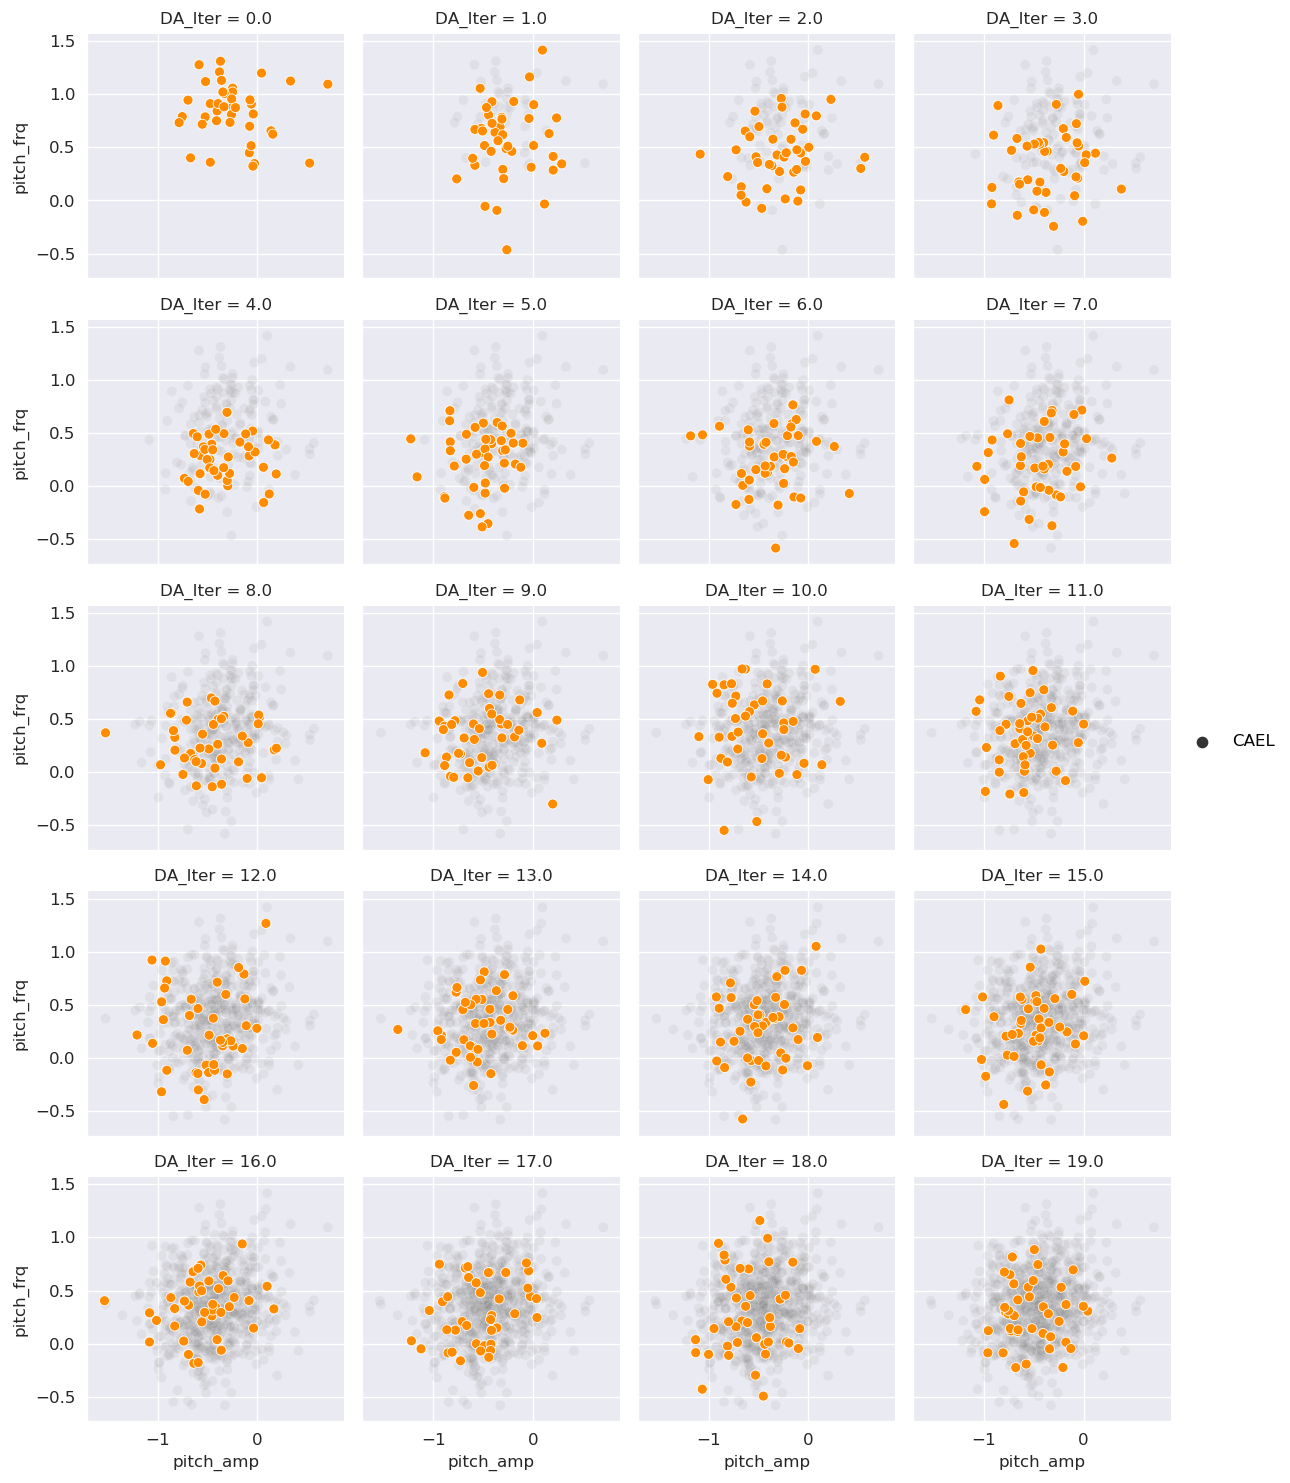

In [10]:
All_Data_Set(PST)

# EnVar-DL

## All Samples 

In [11]:
df_samples = copy.copy(PST.get_DataFram())
df_samples["Status"] =np.nan
df_samples.head()

,Unnamed: 0,pitch_amp,pitch_frq,Sample,DA_Iter,Solver,Folder_DATA,file_observabels,Status
0,0,1.861630,74.767668,0,0.0,CAEL,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,NaN
1,1,2.848025,64.015646,1,0.0,CAEL,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,NaN
2,2,4.982543,71.424509,2,0.0,CAEL,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,NaN
3,3,2.680507,83.027008,3,0.0,CAEL,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,NaN
4,4,2.153593,65.043908,4,0.0,CAEL,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,/home/avicene/Documents/These/CODE/DATA_ASSIMI...,NaN


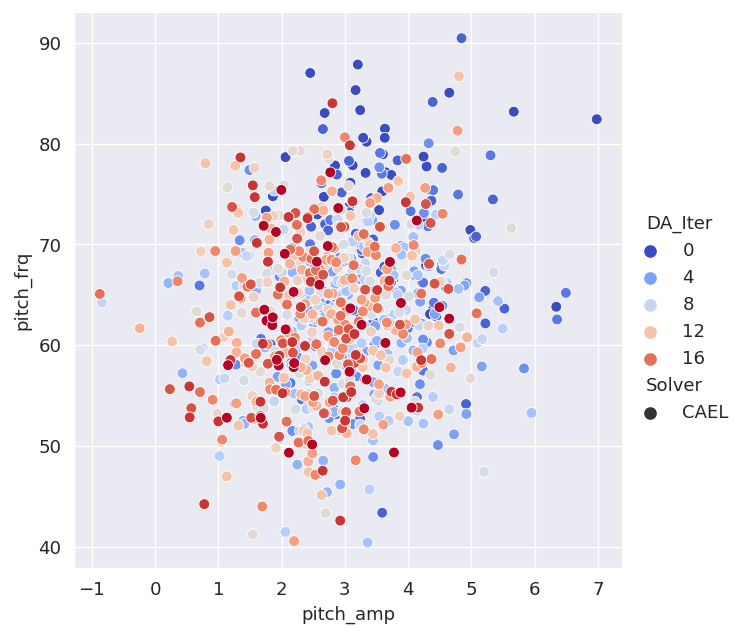

In [12]:
with sns.axes_style("darkgrid"):
    ax=sns.relplot(data=df_samples, x=PST.CFG.Param_Name[0], y=PST.CFG.Param_Name[1],hue ="DA_Iter",palette="coolwarm", style="Solver" )
    ax.fig.set_dpi(130)

## Normalize all Samples

In [13]:
df_samples_bar = PCG.Calc_Param_bar(df_samples,PST.CFG)

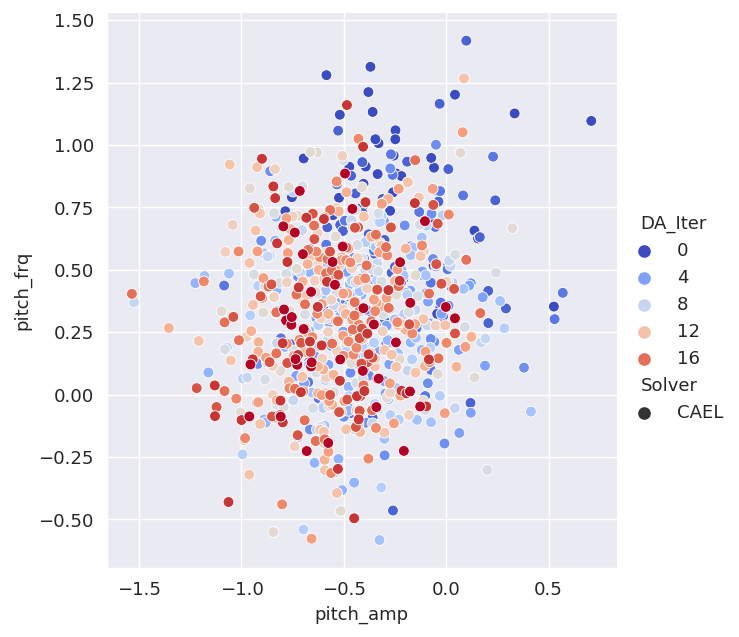

In [14]:
with sns.axes_style("darkgrid"):
    ax=sns.relplot(data=df_samples_bar, x=PST.CFG.Param_Name[0], y=PST.CFG.Param_Name[1],hue ="DA_Iter",palette="coolwarm", style="Solver" )
    ax.fig.set_dpi(130)

## EnVar-DL

In [15]:
### Coupling Parameters
DL_Model           = "FNN"
DL_Rc              = (8/10)*PST.CFG.DA_Param_Sigma
DL_Pred_max        = 0.14*PST.CFG.DA_N_ens
DL_Train_max       = 1.5*PST.CFG.DA_N_ens
DL_use_old_data    = False

# Iteration Actuel  ( assumed)
i_main_loop            = i_main_DL

In [16]:
df_samples_actu     =  df_samples.loc[(df_samples["DA_Iter"] == i_main_loop) | (df_samples["DA_Iter"] == i_main_loop-1)]
df_samples_actu_bar = df_samples_bar.loc[(df_samples_bar["DA_Iter"] == i_main_loop) | (df_samples_bar["DA_Iter"] == i_main_loop-1)]

### Automatic Cluster Detection 

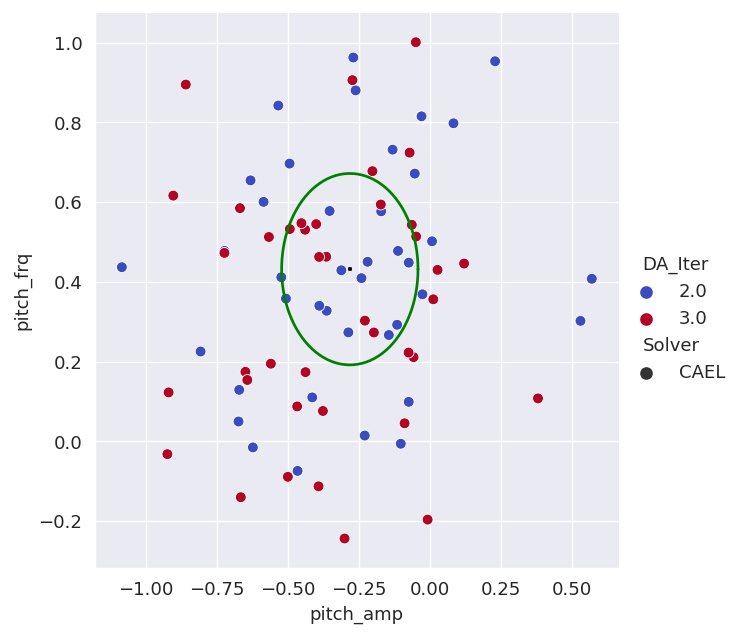

In [17]:
with sns.axes_style("darkgrid"):
    ax=sns.relplot(data=df_samples_actu_bar, x=PST.CFG.Param_Name[0], y=PST.CFG.Param_Name[1],hue ="DA_Iter",palette="coolwarm", style="Solver" )
    ax.fig.set_dpi(130)

    # compute center 
    center = PCG.Calc_Cg(df_samples_bar, i_main_loop,PST.CFG.Param_Name)
    # rayon
    r =  DL_Rc

    theta = np.linspace(0, 2*np.pi, 100)
    x1 = r*np.cos(theta) + center[0]
    x2 = r*np.sin(theta) + center[1]
    plt.plot(x1,x2, color = "green")
    plt.scatter([center[0]],[center[1]],marker = "s",color="k",s=1)

## Traning And Pred Data set

In [18]:

df_coupling_samples_bar = PCG.Get_Train_Pred_Ensemble(copy.copy(df_samples_bar), PST.CFG.Param_Name, DL_use_old_data, DL_Pred_max, 
                                                  DL_Train_max, DL_Rc, i_main_loop)


In [19]:
df_coupling_samples_bar.loc[(df_coupling_samples_bar["Prediction"] == True), "Status" ] = "Prediction"
df_coupling_samples_bar.loc[(df_coupling_samples_bar["Training"] == True), "Status" ] = "Training"

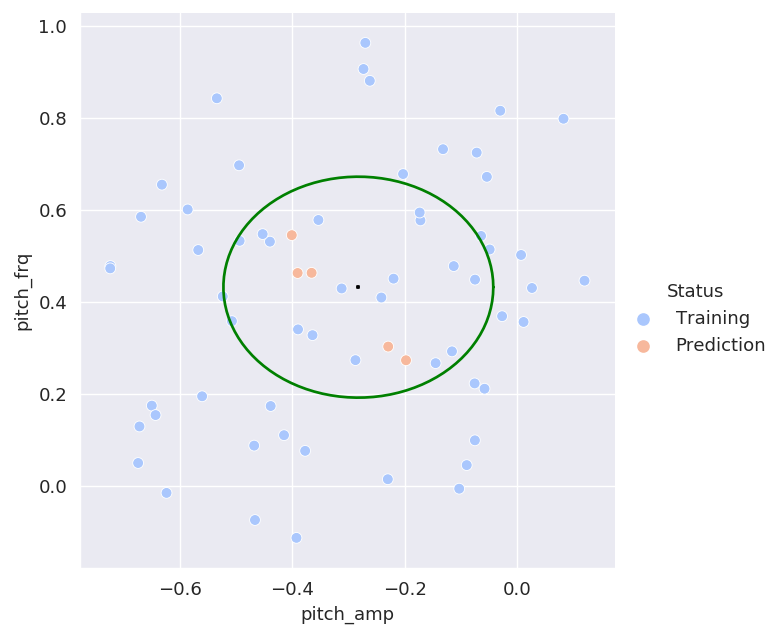

In [20]:
with sns.axes_style("darkgrid"):
    ax=sns.relplot(data=df_coupling_samples_bar, x=PST.CFG.Param_Name[0], y=PST.CFG.Param_Name[1],hue ="Status",palette="coolwarm",)
    ax.fig.set_dpi(130)

    # compute center 
    center = PCG.Calc_Cg(df_samples_bar, i_main_loop,PST.CFG.Param_Name)
    # rayon
    r =  DL_Rc

    theta = np.linspace(0, 2*np.pi, 100)
    x1 = r*np.cos(theta) + center[0]
    x2 = r*np.sin(theta) + center[1]
    plt.plot(x1,x2, color = "green")
    plt.scatter([center[0]],[center[1]],marker = "s",color="k",s=1)

##  The FNN model

In [21]:
## import tensorflow
# deactivate CUDA
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [22]:
Path_FNN = "../../Src_Solver/FNN/"
sys.path.append(Path_FNN)
from  Pre_processing_data import PTD_param
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Flatten,Dense



/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [23]:
def MyFNN(input_shape,n_out, N_layer=2, N_units = 30, learning_rate=1e-4):
    model              =  Sequential()
    initializer        =  tf.keras.initializers.GlorotUniform(seed=101)
    optimizer          =  tf.keras.optimizers.Adam(learning_rate=learning_rate) 
    bias_initializer   =  tf.keras.initializers.Zeros()
    kernel_regularizer =  tf.keras.regularizers.l2(l2=0)
    model.add(Dense(N_units, kernel_regularizer=kernel_regularizer,activation='tanh',bias_initializer=bias_initializer,kernel_initializer=initializer,input_shape=input_shape))
    
    for layer in range(N_layer-1) :
        model.add(Dense(N_units, kernel_regularizer=kernel_regularizer,activation='tanh',bias_initializer=bias_initializer,kernel_initializer=initializer))
    
    model.add(Flatten())
    model.add(Dense(n_out))
    
    model.compile(optimizer=optimizer, loss='mse')
    
    return model

def MyFOM(param,cfg = PST.CFG,df_samples=df_samples_bar ):
    ####  Chercher param dans le data frame (df_Param_Ens)
    ## code  : est une chaine de caractere qui sera executer comme une ligne de code  
    ##         je fais de cette maniere pour eviter les if ( Dim_param = 1 ... or  Dim_param = 2 .. )
    code  = "temp_df = df_samples.loc["

    for d in range(len( cfg.Param_Name) ):
        code +="(df_samples[cfg.Param_Name["+str(d)+"]]==param["+str(d)+"])"
        if d < len( cfg.Param_Name)-1 :
            code+=" & "
        else :
            code+= " ]"

    exec(code)

    file = locals()["temp_df"]["file_observabels"].values[0]

    observables = np.loadtxt(file)
    if np.isnan(observables).any() :
        print("Warning !!!!!")
        print("NaN found in ",file)
        sys.exit("ERROR")

    return observables

## Training 

In [24]:
df_samples_train_bar = df_coupling_samples_bar.loc[ (df_coupling_samples_bar["Status"] =="Training")]
df_samples_test_bar  = df_coupling_samples_bar.loc[ (df_coupling_samples_bar["Status"] =="Prediction")]

n_time           = len(PST.time)
n_dof            = len(PST.CFG.Obs_Name)

input_shape      = (1,PST.CFG.Param_Dim)
n_out            = n_dof*n_time

prfx = "_iter_"+str(i_main_loop)

epochs = 900
batch_size = 128

In [25]:
model       = MyFNN(input_shape,n_out,N_layer=5, N_units = 40, learning_rate=51e-4)
Param_Train = df_samples_train_bar[PST.CFG.Param_Name].values
Param_Pred  = df_samples_test_bar[PST.CFG.Param_Name].values
PTD         = PTD_param(model, PST.time,MyFOM, Param_Train, Param_test=Param_Pred, Param_vald=np.array([]),
                                 folder = "", prfx=prfx)

PTD.Get_Dataset()

2023-01-26 15:41:47.417234: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-26 15:41:47.417302: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: cael
2023-01-26 15:41:47.417319: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: cael
2023-01-26 15:41:47.417533: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.47.3
2023-01-26 15:41:47.417584: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.47.3
2023-01-26 15:41:47.417598: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.47.3
2023-01-26 15:41:47.418817: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performa


---- Data Training -------:
        X_train  shape    :  (60, 1, 2)
        Y_train  shape    :  (60, 1000)


---- Data Test -----------:
        X_test  shape     :  (5, 1, 2)
        Y_test  shape     :  (5, 1000)



time  shape    :  (500,)



In [26]:
PTD.Myfit(epochs = epochs, batch_size=batch_size, verbose = 0, validation=False, overwrite=True,save = False)

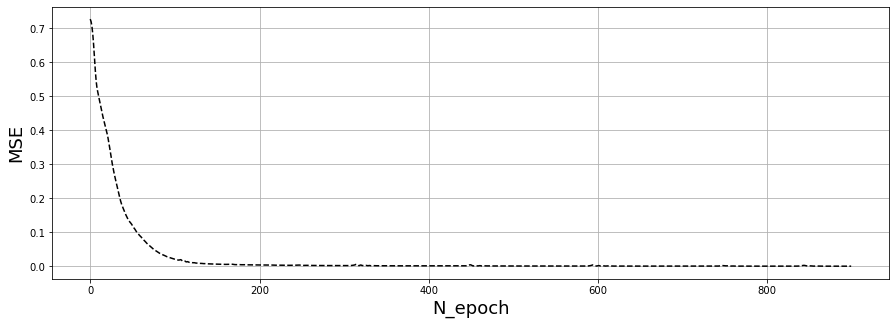

In [27]:
PTD.plot_loss_v0(figsize=(15,5))

In [28]:
30*15

450

## Prediction

In [29]:
a = PTD.Mypredict(Param_test = Param_Pred,overwrite=True)

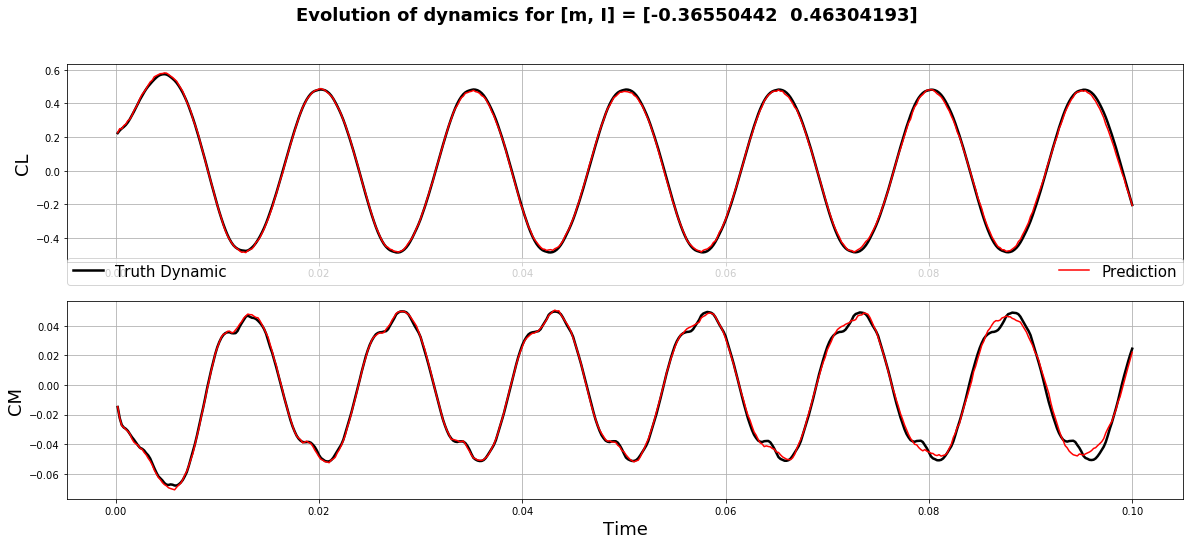

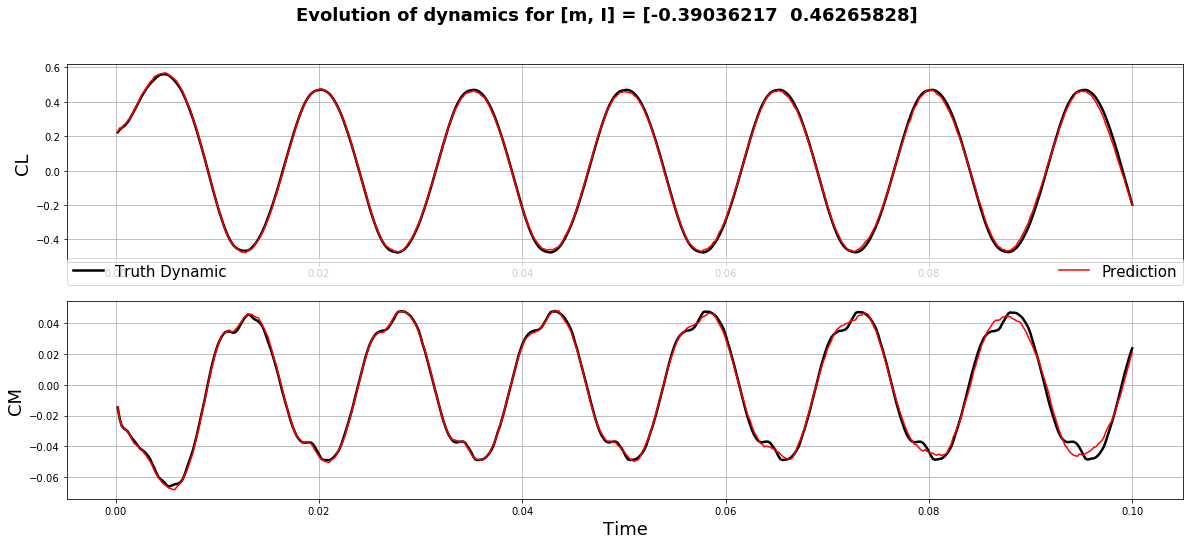

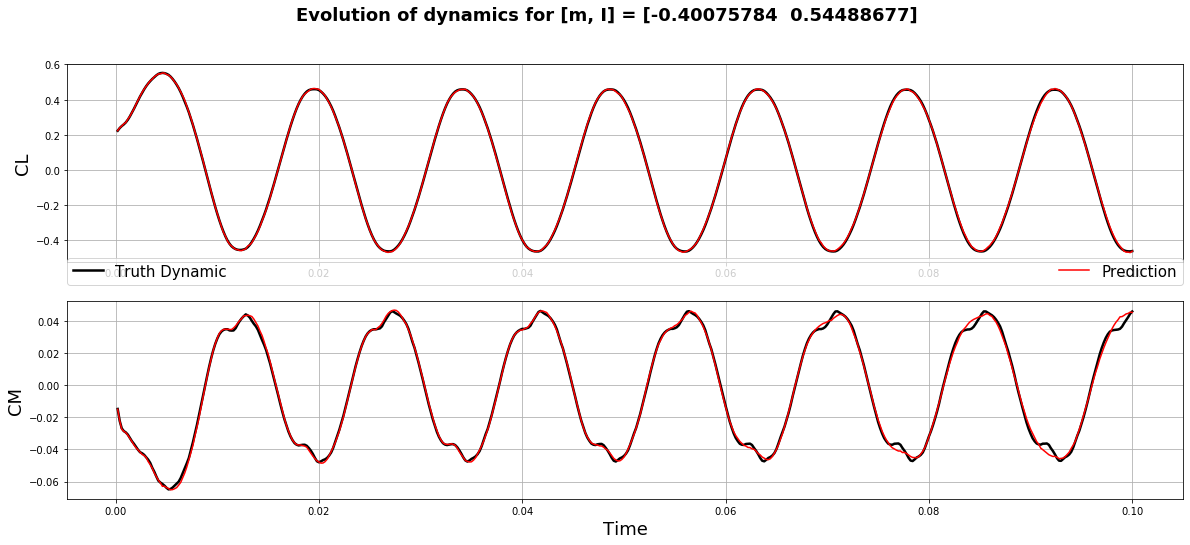

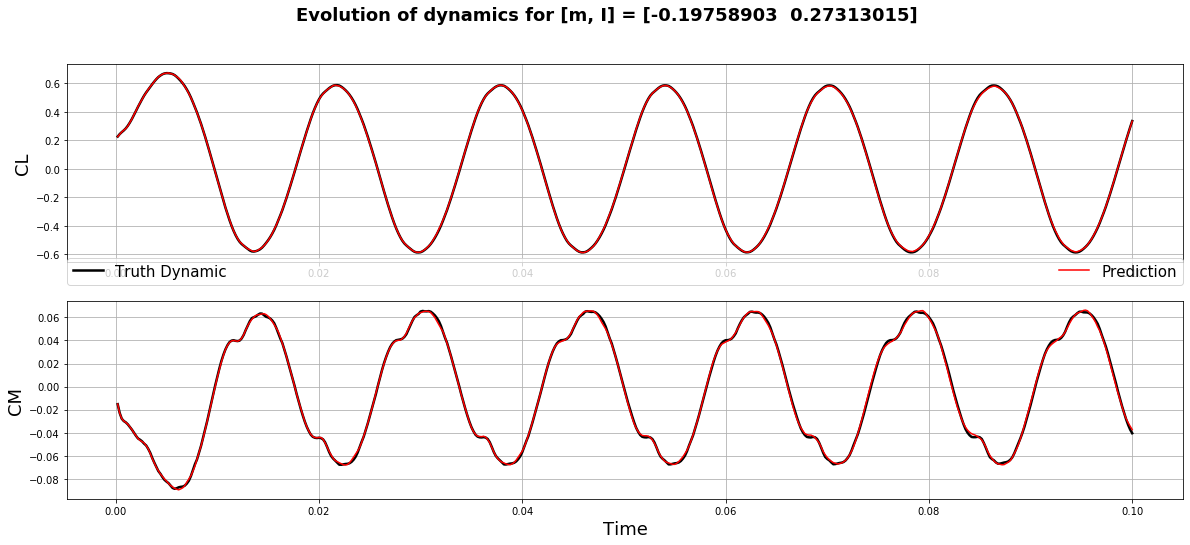

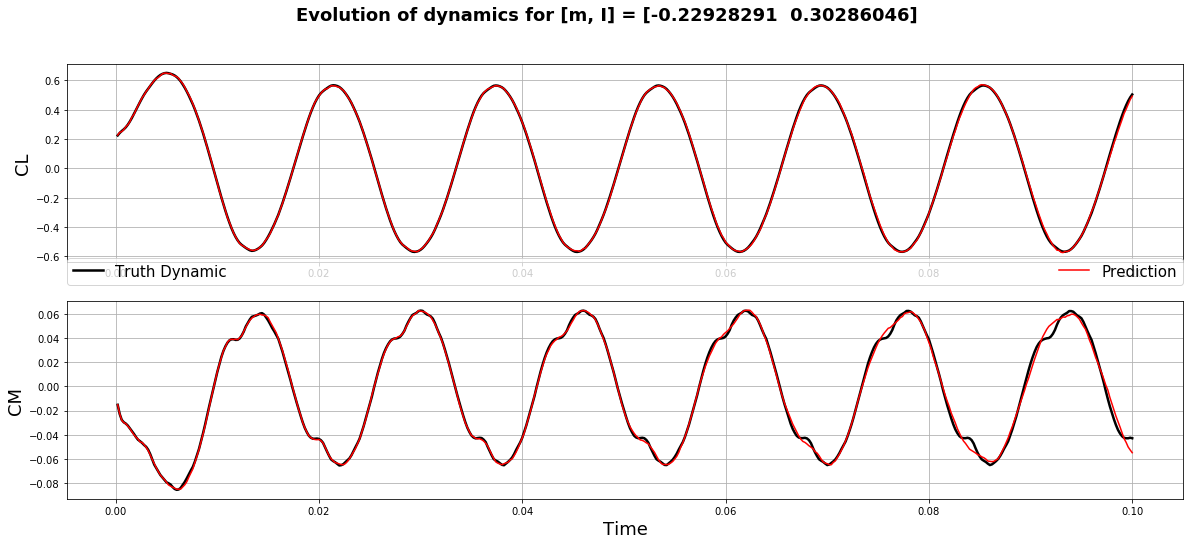

In [30]:
PTD.plot_truth_predi(figsize=(20,8),name_mu = "[m, I]", ylabel = PST.CFG.Obs_Name)
plt.show()

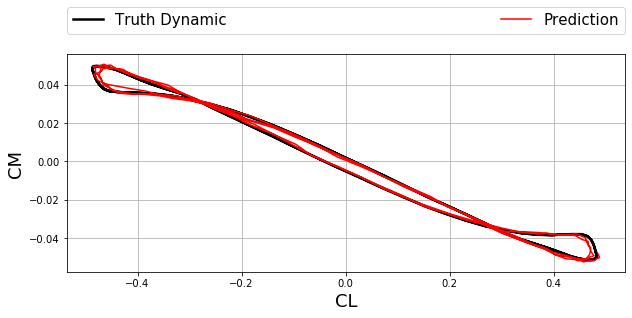

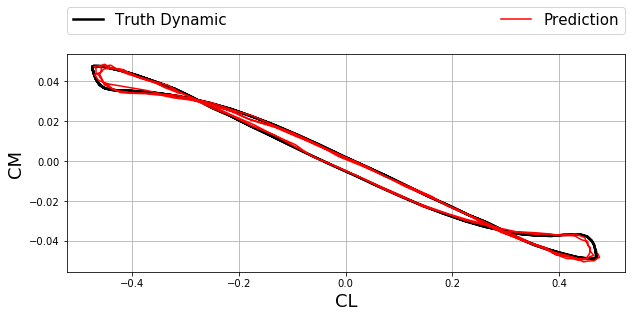

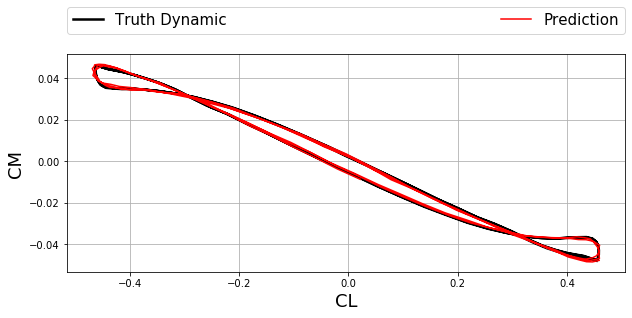

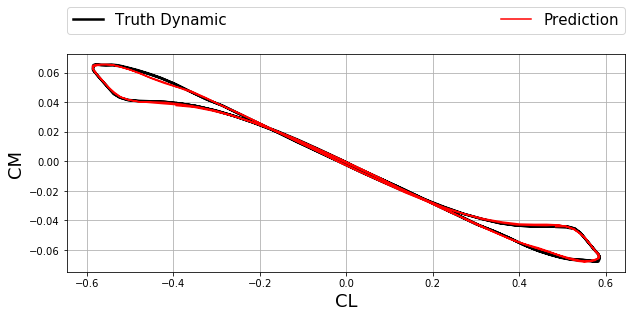

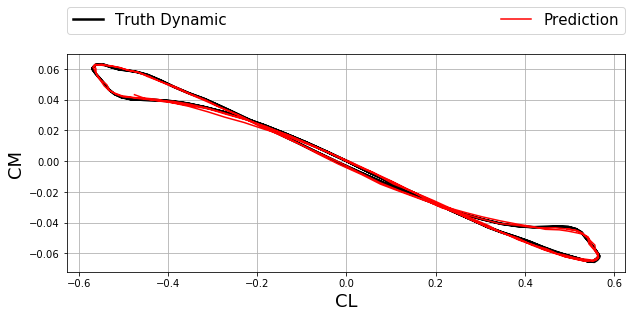

In [31]:
PTD.plot_truth_predi_diag(figsize=(10,4),name_mu = "[m, I]", ylabel = PST.CFG.Obs_Name, t_start=0.02, t_end=0.06,title=False)
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error as MSE

for param in   Param_Pred :
    
    y1 = PTD.MyFOM(param)
    y2 = PTD.all_pred[str(param)]
    for it, name in enumerate(PST.CFG.Obs_Name):
        print("MSE of "+name,MSE(y1[:,it],y2[:,it]) )

MSE of CL 0.00010442694758197973
MSE of CM 4.629829660500397e-06
MSE of CL 0.00011802426039940346
MSE of CM 4.738591777337895e-06
MSE of CL 1.4137565841159976e-05
MSE of CM 2.2724950959608517e-06
MSE of CL 9.310352808258767e-06
MSE of CM 1.0685933941740587e-06
MSE of CL 4.036706436564283e-05
MSE of CM 5.7511795062193155e-06
